In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from FVSimulation_phase_density.Finite_volume_method_1D import *
from joblib import Parallel, delayed


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

In [2]:
def simfunc(length):
    chippath = '../DataKian/bTa_LT278W2chip5/'
    lambdanm = 673
    filename = 'KID5_103dBm__TmK20_avgpulse_ampphase.csv'
    KID402 = KID_data(chippath,lambdanm,filename,length)
    KID402.fit_tail(start=150,end=250,showplots=False)
    return KID_sim(KID402,18,232,0.01,1/4,start_offset=5,simtime_approx=100)

In [3]:
lengthlist = np.arange(10,205,10)
datalist = Parallel(n_jobs=-1)(delayed(simfunc)(l) for l in lengthlist)

100%|██████████| 10000/10000 [01:07<00:00, 147.56it/s]


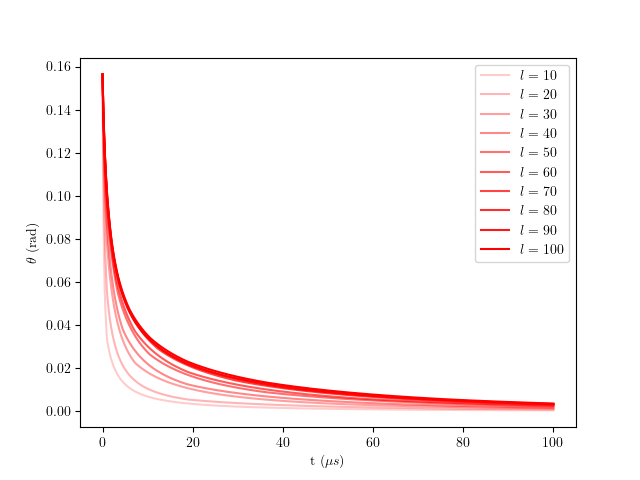

<Figure size 640x480 with 0 Axes>

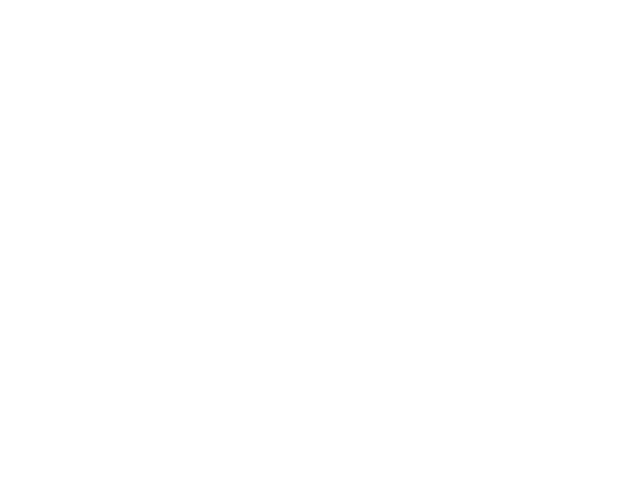

In [4]:
alphalist = np.linspace(0.2,1,10)
for l,alpha,data in zip(lengthlist,alphalist,datalist):
    plt.plot(data.t_axis,data.timeseriestheta,label=f'$l={l}$',c='r',alpha=alpha)
plt.legend()
plt.ylabel(r'$\theta$ (rad)')
plt.xlabel(r't $(\mu s)$')
plt.show()
plt.figure()


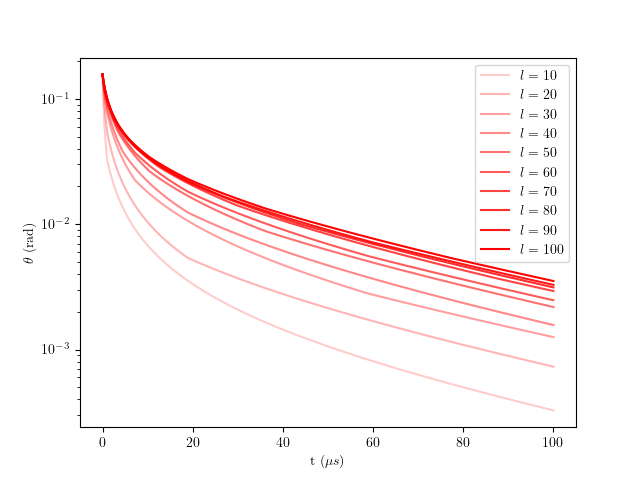

<Figure size 640x480 with 0 Axes>

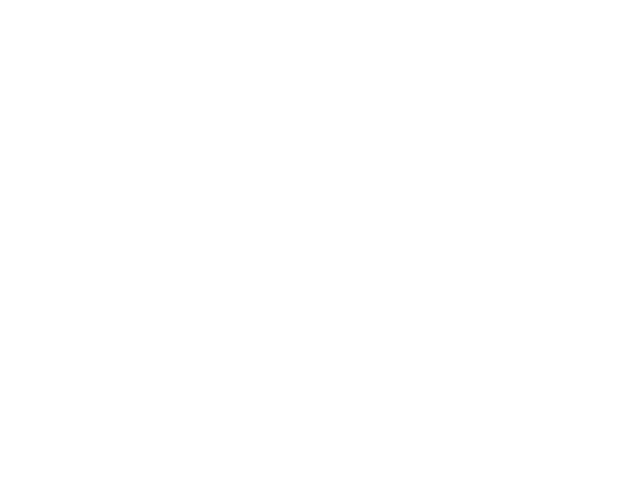

In [5]:
alphalist = np.linspace(0.2,1,10)
for l,alpha,data in zip(lengthlist,alphalist,datalist):
    plt.semilogy(data.t_axis,data.timeseriestheta,label=f'$l={l}$',c='r',alpha=alpha)
plt.legend()
plt.ylabel(r'$\theta$ (rad)')
plt.xlabel(r't $(\mu s)$')
plt.show()
plt.figure()
